# 8. Optimization

## 8.7 Bound optimization

### 8.7.1 The general algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import multivariate_normal

def f1(x):
    return np.log(multivariate_normal.pdf(x, 0, 0.25**2)) + 1

def f2(x):
    return np.log(multivariate_normal.pdf(x, 0.9, 0.22**2)) + 15.1741

def f3(x):
    return (
        5 * np.sin(2 * (x - 0.5))
        + np.log(multivariate_normal.pdf(0.5 * x, 0, 0.25**2)) + 1
        + np.log(multivariate_normal.pdf(0.5 * x, 1, 0.2**2)) + 20
        + 2.0342 # 3.5
        + 20 * np.transpose(multivariate_normal.pdf(x, -2, 0.5**2))
        - 20 * np.transpose(multivariate_normal.pdf(x, 3, 1**2))
        - 70 * np.transpose(multivariate_normal.pdf(x, 4, 0.5**2))
        + 40 * np.transpose(multivariate_normal.pdf(x, -3, 0.5**2))
        + 100 * np.transpose(multivariate_normal.pdf(x, -4, 0.8**2))
        + 10 * np.transpose(multivariate_normal.pdf(x, 3, 0.3**2))
        - 10 * np.transpose(multivariate_normal.pdf(x, -2.8, 0.5**2))
    )

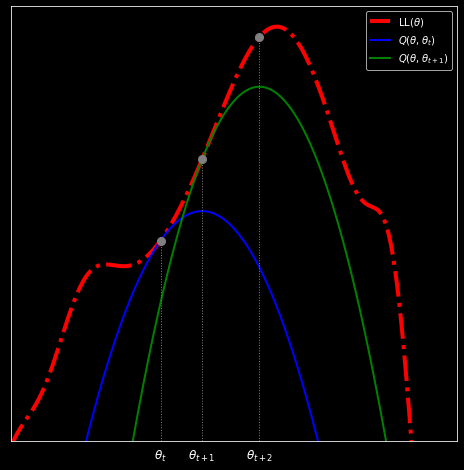

In [3]:
domain = np.arange(-5, 5.01, 0.01)

_, ax = plt.subplots(figsize=(8,8))

ax.plot(domain, f3(domain), '-.r', linewidth=4, label='$\operatorname{LL}(\\theta)$')
ax.plot(domain, f1(domain), '-b', linewidth=2, label='$Q(\\theta,\\theta_t)$')
ax.plot(domain, f2(domain), '-g', linewidth=2, label='$Q(\\theta,\\theta_{t+1})$')

for x, xtick in zip([-0.65, 0, 0.9], ['$\\theta_t$', '$\\theta_{t+1}$', '$\\theta_{t+2}$']):
    ax.vlines(x, -25, f3(x), color='gray', linewidth=1, linestyles='dotted')
    ax.plot(x, f3(x), 'o', color='gray', markersize=8)
    ax.text(x, -27, xtick, fontsize=12, ha='center')

ax.axis([-3, 4, -25, 25])
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.legend();